# Survival Curve Estimation

- How the **Kaplan-Meier** model works and how to fit, visualize, and interpret it
- Apply this model to explore how categorical variables affect survival
- Learn how to supplement your analysis using hypothesis testing methods like the log-rank test

## Kaplan-Meier Estimator

The most widely used method for estimating survival functions

- Also known as the **Product-Limit Estimator**/**K-M Estimator**
- Computes survival probabilities and estimates survival functions
- It is a **Non-parametric method** 
  - Construct survival curve solely from collected data
  - Does not assume the underlying distribution has specific parameter

### The Math Intuition

- The **K-M Estimator** is built on the rule of probability
- Given a duration time $t_i$, we can measure the number of events $d_i$ that happened at $t_i$ and the number of individuals $n_i$ that survived up to $t_i$

$$S(t)=P_{i:t_i\leq{t}}(1-\frac{d_i}{n_i})$$

$\frac{d_i}{n_i}$ is the percent of chance of an event happening at $t_i$

$1 - \frac{d_i}{n_i}$ is the percent of chance of survival at $t_i$

### Why is it called the Product-Limit Estimator?

Suppose we have events at 3 times: 1, 2, 3

The survival rate at $t=2$ is:

$$S(t=2)=(1-\frac{d_1}{n_1}) \cdot (1-\frac{d_2}{n_2})$$

The survival rate at $t=3$ is:

$$S(t=3) = S(t=2) \cdot (1-\frac{d_3}{n_3})$$

This intuitive property is behind the name **Product-Limit Estimator**

- *The Survival Rate at time $t$ is equal to the product of the percentage of chance of surviving at time $t$ and each prior time*

### Assumptions to Keep in Mind

When using K-M Estimator, the data **must satisfy the following conditions**:

- The events are **Unambiguously defined** (happens clearly at a specified time)
- **Survival probabilities are comparable in all subjects** (do not depend on when they entered the study or not)
- **Censorship is non-informative** (censored observations have the same survival prospects as observations that continue)

### Kaplan-Meier Estimator With `lifelines`

In [1]:
# Import the KaplanMeierFitter
from lifelines import KaplanMeierFitter
import pandas as pd

In [2]:
# Our dataset
regimes = pd.read_csv("data/regimes.csv")
display(regimes.head())
display(regimes.shape)

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


(1808, 12)

In [3]:
# Instantiate a KaplanMeierFitter class
kmf = KaplanMeierFitter()

In [4]:
# Fit on the data
kmf.fit(
    durations=regimes["duration"],      # Duration
    event_observed=regimes["observed"]  # Censorship
)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1808 total observations, 340 right-censored observations>

**The fitted `kmf` model contains valuable information**

In [5]:
# What is the median survival time? (Median lifetime of a regime)
print(kmf.median_survival_time_)

4.0


In [6]:
# What is the probability of survival at each unit of time? (Probability that the regime will keep on living on per year)
print(kmf.survival_function_)

          KM_estimate
timeline             
0.0          1.000000
1.0          0.721792
2.0          0.601973
3.0          0.510929
4.0          0.418835
5.0          0.334008
6.0          0.280902
7.0          0.256825
8.0          0.221975
9.0          0.205147
10.0         0.181350
11.0         0.161200
12.0         0.150332
13.0         0.139197
14.0         0.124896
15.0         0.117845
16.0         0.113521
17.0         0.108010
18.0         0.099792
19.0         0.093632
20.0         0.090994
21.0         0.085479
22.0         0.078473
23.0         0.074113
24.0         0.071088
25.0         0.069543
26.0         0.066231
27.0         0.062745
28.0         0.060900
29.0         0.056971
30.0         0.052751
31.0         0.050353
32.0         0.043160
33.0         0.038364
34.0         0.038364
35.0         0.030143
36.0         0.030143
38.0         0.030143
39.0         0.030143
40.0         0.030143
42.0         0.030143
44.0         0.030143
46.0         0.030143
47.0      

We can predict a future survival probability using the model

In [7]:
# What is the survival probability at a specific time? (Prediction of survival at a specific time)
print(kmf.predict(100)) # What is the probability that a regime will be alive in 100 years

0.015071681623194312


### Benefits and Limitations of K-M Estimator

Benefits | Limitations
:--------|:-----------
Intuitive interpretation of survival probabilities | Survival curve is usually not smooth
Flexible to use on any time-to-event data | If 50%+ of the data is censored, `.median_survival_time_` cannot be calculated (`inf`)
Usually the first model to attempt on time-to-event data | Not effective for analyzing the covariance of survival functions

**Note: Do not remove Censored Data just so you can run K-M**

- Removing censored data from survival analysis will lead to a biased survival function

### Application on `echocardiogram` Data

- **Does pericardial effusion, fluid build-up around the heart, affects heart attack patients' survival outcomes?**
- **Compare survival distributions from patients with and without pericardial effusion**

In [8]:
# Our dataset
echocardiogram = pd.read_csv("data/echocardiogram.csv")
display(echocardiogram.head())
display(echocardiogram.shape)

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0


(133, 13)

In [9]:
# Only keep the needed columns
echocardiogram = echocardiogram[["survival", "alive", "age", "pericardialeffusion", "name"]]
echocardiogram["observed"] = 1 # Assuming no censorship

# Dropping the NA's for now
echocardiogram = echocardiogram.dropna(axis="index")

display(echocardiogram.head())
display(echocardiogram.shape)

,survival,alive,age,pericardialeffusion,name,observed
0,11.0,0.0,71.0,0.0,name,1
1,19.0,0.0,72.0,0.0,name,1
2,16.0,0.0,55.0,0.0,name,1
3,57.0,0.0,60.0,0.0,name,1
4,19.0,1.0,57.0,0.0,name,1


(125, 6)

In [10]:
# Patients with pericardial effusion
has_pericardial_effusion = echocardiogram[echocardiogram["pericardialeffusion"] == 1]
display(has_pericardial_effusion.head())
display(has_pericardial_effusion.shape)

,survival,alive,age,pericardialeffusion,name,observed
11,52.0,0.0,62.000,1.0,name,1
15,24.0,0.0,55.000,1.0,name,1
16,0.5,1.0,69.000,1.0,name,1
17,0.5,1.0,62.529,1.0,name,1
19,1.0,1.0,66.000,1.0,name,1


(24, 6)

In [11]:
# Patients without pericardial effusion
none_pericardial_effusion = echocardiogram[echocardiogram["pericardialeffusion"] == 0]
display(none_pericardial_effusion)
display(none_pericardial_effusion.shape)

,survival,alive,age,pericardialeffusion,name,observed
0,11.0,0.0,71.0,0.0,name,1
1,19.0,0.0,72.0,0.0,name,1
2,16.0,0.0,55.0,0.0,name,1
3,57.0,0.0,60.0,0.0,name,1
4,19.0,1.0,57.0,0.0,name,1
...,...,...,...,...,...,...
128,7.5,1.0,64.0,0.0,name,1
129,41.0,0.0,64.0,0.0,name,1
130,36.0,0.0,69.0,0.0,name,1
131,22.0,0.0,57.0,0.0,name,1


(101, 6)

In [12]:
# Instantiate Kaplan Meier object for patients with and without pericardial effusion
kmf_has_pe = KaplanMeierFitter()
kmf_no_pe = KaplanMeierFitter()

# Fit Kaplan Meier estimators to each DataFrame
kmf_has_pe.fit(
    durations=has_pericardial_effusion["survival"], 
    event_observed=has_pericardial_effusion["observed"]
)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 24 total observations, 0 right-censored observations>

In [13]:
# Fit the model
kmf_no_pe.fit(
    durations=none_pericardial_effusion["survival"], 
    event_observed=none_pericardial_effusion["observed"]
)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 101 total observations, 0 right-censored observations>

In [14]:
# Print out the median survival duration of each group
print("The median survival duration (months) of patients with pericardial effusion: ", kmf_has_pe.median_survival_time_)
print("The median survival duration (months) of patients without pericardial effusion: ", kmf_no_pe.median_survival_time_)

The median survival duration (months) of patients with pericardial effusion:  12.0
The median survival duration (months) of patients without pericardial effusion:  25.0


## Visualizing K-M Model

### How to Construct a K-M Survival Curve?

Let's consider a *Toy* data with $n=5$

In [15]:
toys = pd.DataFrame([{
    "duration": 2,
    "observed": 1
}, {
    "duration": 5,
    "observed": 0
}, {
    "duration": 3,
    "observed": 1
}, {
    "duration": 5,
    "observed": 1
}, {
    "duration": 2,
    "observed": 0
}])

toys

,duration,observed
0,2,1
1,5,0
2,3,1
3,5,1
4,2,0


#### Steps

1. Sort the duration $T$ in increasing order: If tied, uncensored data before censored data

- Here, we use `+` to denote censored data

<img src="images/survival-curve-arranged-durations.png" width=9%>

2. For each $t_i$, find: $d_i$, $n_i$, and $(1-\frac{d_i}{n_i})$
  - `d_i`: Number of events at time $i$ (Here, one event per time). If subject is censored, count as `0`
  - `n_i`: Number of subjects that survived up to (but not including) time $i$ (still at risk)
    - **Exclude Censored**: If a subject is censored at a prior time, it is no longer at risk

<img src="images/survival-curve-step-2.png" width=30%>

3. For each $t_i$, multiply $(1-\frac{d_i}{n_i}) \cdot S(t_{i-1}) ... \cdot S(t_0)$
  - If a subject is censored, it counts as 0 events
  - Now, we can calculate the percentage of survival at each time
  - Multiply each one with its prior times

<img src="images/construct-km-curve.png" width=40%>

Plotting the **Survival Curve**

- Survival Probabilities on $y$-axis
- Time/Duration on $x$-axis

<img src="images/survival-probability-plot.png" width=40%>

### Interpreting the Survival Curve

The survival probabilities at each time between the start ($t=0$) and end ($t=5$) of observation

- **Common Misconception: If the survival drops to 0, not subject survived**
  - The curve will drop to 0 as long as the last observation is not censored (true event duration is known)

### Plotting the K-M Survival Curve

- Real-life datasets are much larger
- There is no need to plot by hand: We can use libraries

In [16]:
# Import libraries needed
from lifelines import KaplanMeierFitter
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Our dataset
regimes = pd.read_csv("data/regimes.csv")
display(regimes.head())
display(regimes.shape)

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


(1808, 12)

In [18]:
# Instantiate a KaplanMeierFitter class
kmf = KaplanMeierFitter()

In [19]:
# Fit the model
kmf.fit(
    durations=regimes["duration"], 
    event_observed=regimes["observed"]
)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1808 total observations, 340 right-censored observations>

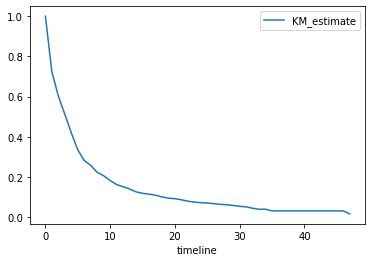

In [20]:
# Plotting the survival function point-estimates as a continuous line
kmf.survival_function_.plot()
plt.show();

We can also plot with a 95% Confidence-Interval

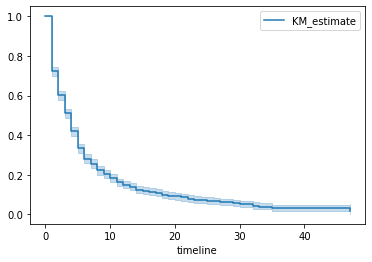

In [21]:
# Plotting the survival function with 95% CI
kmf.plot_survival_function()
plt.show();
# Same thing as using:
# kmf.plot()
# plt.show();

Or, we can plot as stepped line without the CI

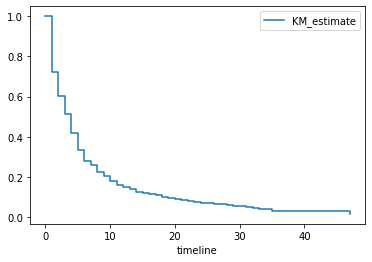

In [22]:
# Plotting the survival function as stepped line wihtout CI
kmf.plot_survival_function(ci_show=False)
plt.show();

#### Why is the CI Useful?

- A way to quantify how uncertain we are about each point estimate of survival probabilities
  - **Wide CI** = Less-certain, often due to smaller sample size
  - **Narrow CI** = More-certain, often due to larger sample size

- As the curve progress, the CI can get wider as there are less and less at-risk cases
- As long as the last observation is not censored, the curve will drop to 0

## Applying Survival Analysis to Groups

 We can compare survival analysis functions between groups of data
 
 - We could group the observations by a specific categorical column
 - **E.g. Is there a difference between the regimes survival in Asia vs Europe?**
 - We can use different dimensions for grouping as well
 - In clinical trials, the attributes can be the type of treatment assignement (**Treatment vs Placebo**)

### Types of Survival Group Comparisons

- **Are any point-estimates or survival statistics different?**
  - Compare 2 groups survival probabilities at specific time
  - Compare total proportion of survived subjects across 2 groups
- **Are the underlying survival distributions different?**
  - Requires formal hypothesis testing
- **How much does an attribute affect survival?**
  - Requires regression-based modeling frameworks

### Visualizing Group

We can fit KM survival function to each group and visualize side-by-side

- Simple to execute and interpret
- Non-parametric: Flexible for different type of time-to-event data
- Useful to illustrate the differences in Survival Distribution functions

**Note: Create a Boolean mask for each group (dummy variables)**

In [23]:
# Our dataset
regimes = pd.read_csv("data/regimes.csv")
display(regimes.head())
display(regimes.shape)

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


(1808, 12)

In [24]:
# How many groups do we have for continent?
regimes["un_continent_name"].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [25]:
# Creating Boolean Masks
asia = (regimes["un_continent_name"] == "Asia")
europe = (regimes["un_continent_name"] == "Europe")
africa = (regimes["un_continent_name"] == "Africa")
americas = (regimes["un_continent_name"] == "Americas")
oceania = (regimes["un_continent_name"] == "Oceania")

In [26]:
# Instantiate a KaplanMeierFitter class
kmf = KaplanMeierFitter()

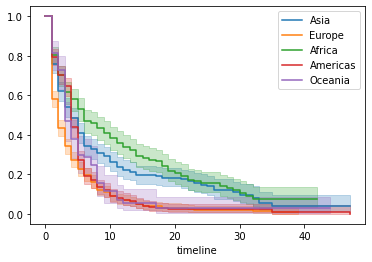

In [27]:
continents = [(asia, "Asia"), (europe, "Europe"), (africa, "Africa"), (americas, "Americas"), (oceania, "Oceania")]

# Creating the figure and fitting
ax = plt.subplot(111)

# Fit the model with unique label one by one
for cont, lbl in continents:
    kmf.fit(
        durations=regimes[cont]["duration"],
        event_observed=regimes[cont]["observed"],
        label=lbl
    )

    # Plot on the figure
    kmf.plot_survival_function(ax=ax)
    
# Show the figure
plt.show();

### Interpreting Groups' Survival Curves

- Looking at the slopes, regimes in Europe and Oceania dies off faster than regimes in Asia and Africa
- Looking at Proportion: At any given duration, a higher proportion of regimes in Europe die off than regimes in Africa 
- If the Confidence Intervals overlap, it is less likely that there is a real differences between the curves
  - Mostly difference due to chance
  - Without Confidence Intervals, there is a big gap between the survival curves
  - The Confidence Intervals show that the observed gap might not be due to real differences in their survival functions
  - **However, just because the CI overlap does not mean that there is no difference**
  - **We should be careful about areas where the confidence intervals overlap**
    - **We need more formal hypothesis testing or regression-based methods to make a conclusion**

### The log-rank test

This is about comparing scientifically whether the groups' survival distributions are identical or not

- Before you finalize your conclusion from looking at the grah, it's important to scientifically test your hypothesis
- You will use the log-rank test and inspect the p-value to make a decision

#### Hypothesis Testing

- **Hypothesis Testing** is the standard method for statistical inference
- Test if our hypothesis is valid by figuring out the probability that the results happened by chance

<img src="images/hypothesis-testing.png" width=40%>

##### Example of Hypothesis Testing

- $H_0$: California and Nevada residents have the same average income
- $H_1$: California and Nevada residents do not have the same average income
- **$p$-value**: What is the probability that the data would have occured if $H_0$ was true?
  - If $p$ is small, we reject $H_0$ and accept $H_1$
  - If $p$ is large, we cannot reject $H_0$

#### Log-Rank Test and Hypothesis Testing

**Log-rank Test**: Test the $H_0$ that *there is no difference in survival between 2 or more independant groups*

- Compares survival probabilities $S_i$ between groups at each time $t$: $S_1(t)$ vs $S_2(t)$ vs ... $S_i(t)$
- Survival curves for each groups are estimated separately using K-M estimator
- Their Survival Probabilities are compared
- For 2 groups $A$ and $B$:
  - $H_0: S_A(t) = S_B(t)$
  - $H_1: S_A(t) \neq S_B(t)$
  - $p$-Value: If $S_A(t) = S_B(t)$, what's the probability of our data occuring?

<img src="images/multiple-survival-curves.png" width=40%>

This function has 4 required parameters:

- `durations` for each group,
- `event_observed` for each group

This function returns a statistical result object

- `.print_summary()` - Method to prints all the test results
- `.p_value` - Attribute for the resulting p-value
- `.test_statistic` - Attribute for the test statistic

**Note**

- The Log-rank test is *Non-parametric*
- The Log-rank test does not assume the shape of the data
- **When using `lifelines`, the dataset *must be* right-censored (subject #3 below)**
  - We have not observed the result of some subjects when the measurement period ends
  - If there is no censorship, there is no need for the test
  - But we can only apply for right-censored data
- Censorship should be non-informative
  - Censorship is not related to survival duration and outcomes
- For log-rank test for groups > 2, use:
  - `pairwise_logrank_test()` - Compare all possible pairs of survival curves
  - `multivariate_logrank_test()`

<img src="images/applying-log-rank-test.png" width=40%>